# Zuber Ride-Sharing Analysis

This project involves analyzing taxi trip data in Chicago, focusing on two main objectives: exploratory data analysis (EDA) and hypothesis testing. The EDA phase utilizes two datasets: one containing the number of trips completed by various taxi companies and another detailing the average trips ending at specific drop-off locations across the city. The aim is to explore these datasets, identify patterns, and create visualizations to highlight the top-performing taxi companies and the most popular drop-off locations, providing insights into Chicago's taxi trip dynamics.

In the hypothesis testing phase, the analysis focuses on a dataset containing trip details between the Loop and O’Hare International Airport. The objective is to determine whether the average trip duration changes on Saturdays when it rains. This involves formulating null and alternative hypotheses, selecting a significance level, applying statistical tests, and interpreting the results. The project is designed to demonstrate the application of data analysis techniques, generate meaningful insights, and utilize hypothesis testing to support data-driven conclusions.

## Exploratory Data Analysis

### Import Library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [2]:
try:
    # Try loading the file from your laptop path
    data_01 = pd.read_csv('C:/Users/Eugene/Documents/GitHub/TripleTen-Projects/6. Zuber Ride-Sharing Data Analysis/moved_project_sql_result_01.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    data_01 = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/6. Zuber Ride-Sharing Data Analysis/moved_project_sql_result_01.csv')

In [3]:
try:
    # Try loading the file from your laptop path
    data_02 = pd.read_csv('C:/Users/Eugene/Documents/GitHub/TripleTen-Projects/6. Zuber Ride-Sharing Data Analysis/moved_project_sql_result_04.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    data_02 = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/6. Zuber Ride-Sharing Data Analysis/moved_project_sql_result_04.csv')

### Data Understanding

#### data_01

In [4]:
data_01.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


#### data_02

In [6]:
data_02.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [7]:
data_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


### Identification Top 10 Area as the Delivery Point

#### Taxi Company Graph and Travel Count Graph

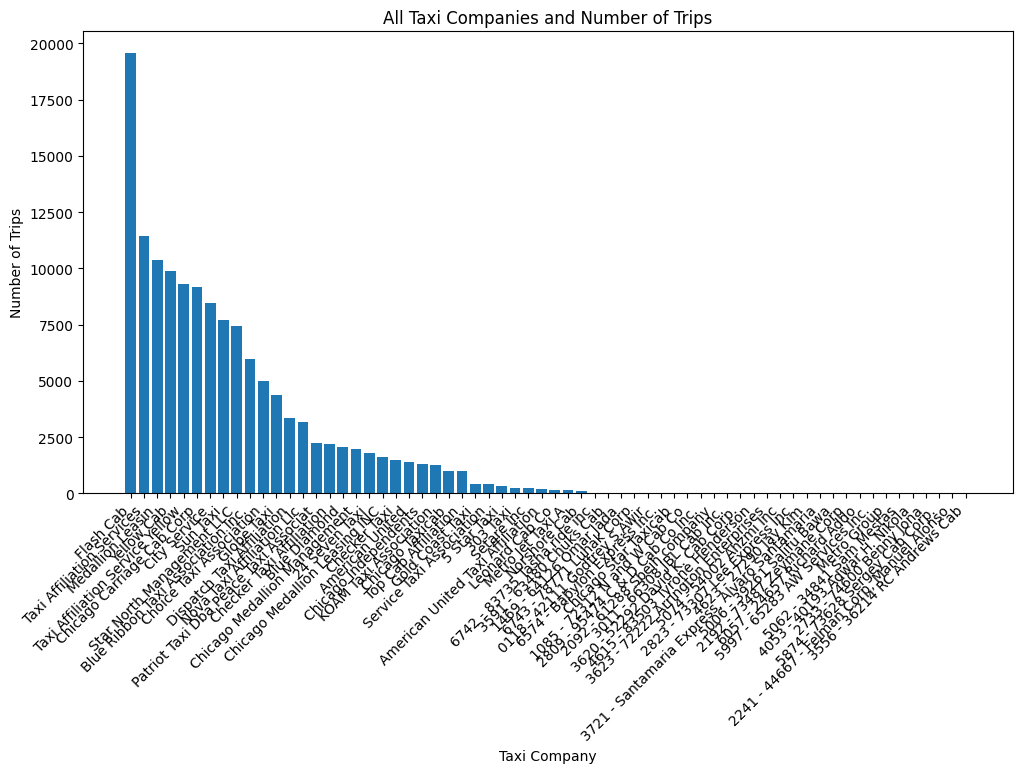

In [8]:
plt.figure(figsize=(12, 6))
plt.bar(data_01['company_name'], data_01['trips_amount'])
plt.title('All Taxi Companies and Number of Trips')
plt.xlabel('Taxi Company')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.show()

In [9]:
sorted_data_01 = data_01.sort_values(by='trips_amount', ascending=False)

In [10]:
top_10_data_01 = sorted_data_01.head(10)

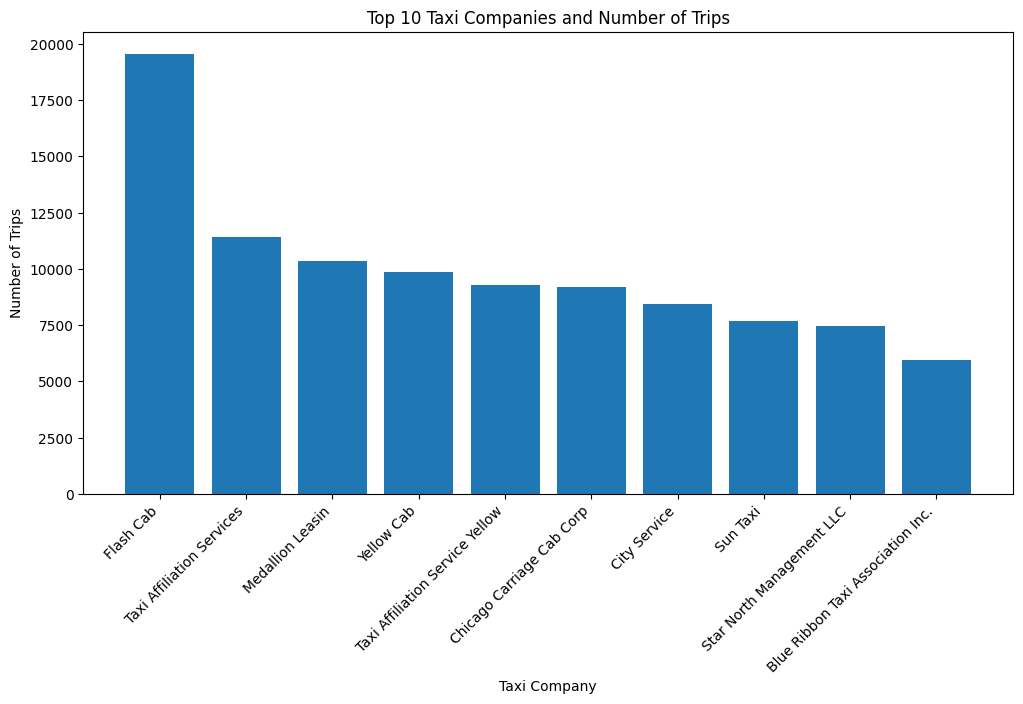

In [11]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_data_01['company_name'], top_10_data_01['trips_amount'])
plt.title('Top 10 Taxi Companies and Number of Trips')
plt.xlabel('Taxi Company')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Top 10 Area based on Delivery Point Graph

In [12]:
top_10_areas = data_02.sort_values(by='average_trips', ascending=False).head(10)

In [13]:
print("\nTop 10 Area as the delivery point:")
print(top_10_areas)


Top 10 Area as the delivery point:
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


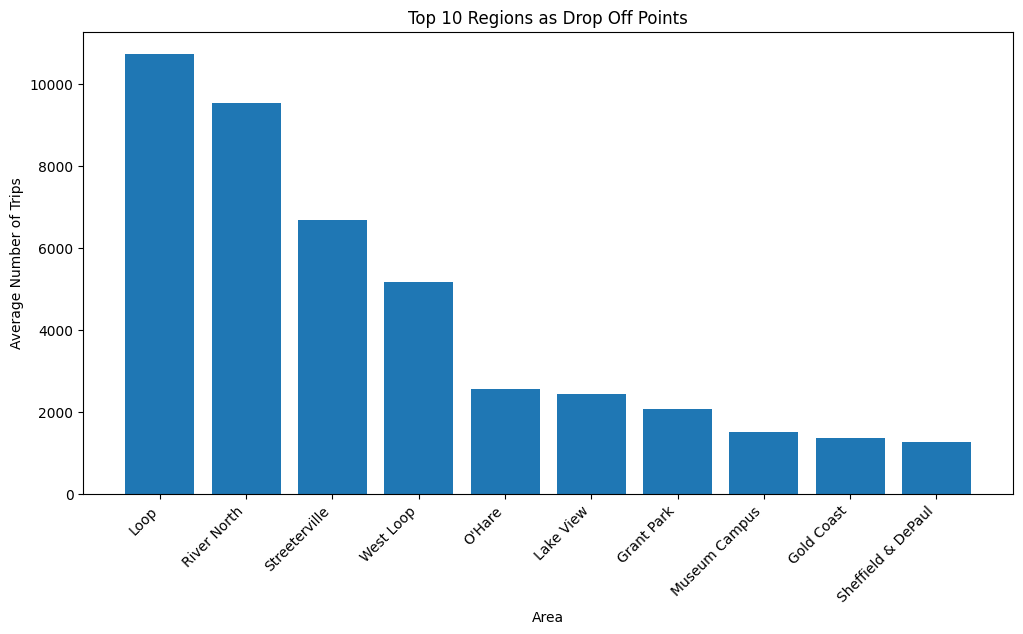

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(top_10_areas['dropoff_location_name'], top_10_areas['average_trips'])
plt.title('Top 10 Regions as Drop Off Points')
plt.xlabel('Area')
plt.ylabel('Average Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.show()

### Conclusion [1]

From the analysis above, there are several points that are quite important point from the analysis, which are the Taxi companies and the destination area. From the Top 10 Taxi company analysis, the 'Flash Cab' company dominate the number of trips conducted and followed by 'Taxi Affiliation Services' company and 'Medallion Leasing' company. There are also an analysis for the top 10 drop-off location with the average number of trips conducted, which 'Loop' location are on top of the chart with average trips result 10727.466667, and followed by 'River North' area with average trips result 9523.666667. 

## Hypothesis Testing 

### Import Additional Libary

In [15]:
from scipy.stats import ttest_ind

### Import Additional Libary

In [16]:
try:
    # Try loading the file from your laptop path
    data_03 = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/6. Zuber Ride-Sharing Data Analysis/moved_project_sql_result_07.csv')
except FileNotFoundError:
    # If the file is not found, try loading from the PC path
    data_03 = pd.read_csv('C:/Users/user/OneDrive/Documents/GitHub/TripleTen-Projects/6. Zuber Ride-Sharing Data Analysis/moved_project_sql_result_07.csv')

### New Data Understanding

In [17]:
data_03.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [18]:
data_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [19]:
data_03['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

### New Data Transformation

In [20]:
data_03['start_ts'] = pd.to_datetime(data_03['start_ts'])

In [21]:
data_03.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


### Hypothesis Testing

- Hipotesis Nol (H0): 
    "The average trip duration from the Loop to O'Hare International Airport did not change during Saturday's rain."
- Hipotesis Alternatif (H1): 
    "The average trip duration from the Loop to O'Hare International Airport changed during Saturday's rain."

alpha = 0.05

In [22]:
alpha = 0.05

#### Split data into 2 group, raining ('Bad') on Saturday and on Saturday only

In [23]:
saturday_and_bad_weather = data_03[(data_03['start_ts'].dt.dayofweek == 5) & (data_03['weather_conditions'] == 'Bad')]

In [24]:
saturday_only = data_03[data_03['start_ts'].dt.dayofweek == 5]

In [25]:
print(saturday_and_bad_weather)

                start_ts weather_conditions  duration_seconds
6    2017-11-04 16:00:00                Bad            2969.0
30   2017-11-18 12:00:00                Bad            1980.0
34   2017-11-04 17:00:00                Bad            2460.0
51   2017-11-04 16:00:00                Bad            2760.0
52   2017-11-18 12:00:00                Bad            2460.0
...                  ...                ...               ...
1031 2017-11-18 12:00:00                Bad            2560.0
1032 2017-11-18 10:00:00                Bad            1908.0
1053 2017-11-18 12:00:00                Bad            2400.0
1061 2017-11-18 16:00:00                Bad            2186.0
1067 2017-11-04 16:00:00                Bad            2834.0

[180 rows x 3 columns]


In [26]:
print(saturday_only)

                start_ts weather_conditions  duration_seconds
0    2017-11-25 16:00:00               Good            2410.0
1    2017-11-25 14:00:00               Good            1920.0
2    2017-11-25 12:00:00               Good            1543.0
3    2017-11-04 10:00:00               Good            2512.0
4    2017-11-11 07:00:00               Good            1440.0
...                  ...                ...               ...
1063 2017-11-25 11:00:00               Good               0.0
1064 2017-11-11 10:00:00               Good            1318.0
1065 2017-11-11 13:00:00               Good            2100.0
1066 2017-11-11 08:00:00               Good            1380.0
1067 2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]


#### Independent T-Test Testing

In [27]:
t_stat, p_value = ttest_ind(saturday_and_bad_weather['duration_seconds'], saturday_only['duration_seconds'], equal_var=False)

#### Test Result

In [28]:
print(f"\nT-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: 6.056477994870787
P-value: 5.01365285259947e-09


In [29]:
if p_value < alpha:
    print("\nReject the null hypothesis. There is sufficient evidence to support the alternative hypothesis.")
else:
    print("\nInsufficient evidence to reject the null hypothesis. There are no significant changes in trip duration.")


Reject the null hypothesis. There is sufficient evidence to support the alternative hypothesis.


### Conclusion [2]

Based on the results of the t-test:

T-statistic: 6.056477994870787

P-value: 5.013652852599471e-09

The p-value is significantly less than the chosen significance level (alpha), which is typically set at 0.05. Therefore, you reject the null hypothesis. Since the null hypothesis is rejected, there is sufficient evidence to support the alternative hypothesis. In practical terms, this means that there is a statistically significant difference in the average trip duration from Loop to O'Hare between rainy Saturdays and non-rainy Saturdays.